In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100% 28.7G/28.7G [04:00<00:00, 102MB/s] 
100% 28.7G/28.7G [04:00<00:00, 128MB/s]


In [ ]:
!mkdir data

In [ ]:
!unzip h-and-m-personalized-fashion-recommendations.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/images/089/0890677001.jpg  
  inflating: data/images/089/0890677002.jpg  
  inflating: data/images/089/0890677004.jpg  
  inflating: data/images/089/0890683001.jpg  
  inflating: data/images/089/0890683002.jpg  
  inflating: data/images/089/0890684001.jpg  
  inflating: data/images/089/0890684002.jpg  
  inflating: data/images/089/0890686002.jpg  
  inflating: data/images/089/0890697001.jpg  
  inflating: data/images/089/0890697002.jpg  
  inflating: data/images/089/0890700001.jpg  
  inflating: data/images/089/0890717001.jpg  
  inflating: data/images/089/0890717002.jpg  
  inflating: data/images/089/0890717003.jpg  
  inflating: data/images/089/0890722001.jpg  
  inflating: data/images/089/0890722002.jpg  
  inflating: data/images/089/0890734001.jpg  
  inflating: data/images/089/0890734003.jpg  
  inflating: data/images/089/0890741001.jpg  
  inflating: data/images/089/0890745001.jpg  
  inflating: data/images/089/

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
articles = pd.read_csv('data/articles.csv')
customers = pd.read_csv('data/customers.csv')
transactions = pd.read_csv('data/transactions_train.csv')

# **ARTICLES**

In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
print(articles.shape)
articles.head(3)

(105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [ ]:
print(articles.columns)

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


# Fields In Articles Dataset

> `article_id` **<span style="color:#023e8a;">: A unique identifier of every article.</span>**  
> `product_code`, `prod_name` **<span style="color:#023e8a;">: A unique identifier of every product and its name (not the same).</span>**  
> `product_type`, `product_type_name` **<span style="color:#023e8a;">: The group of product_code and its name</span>**  
> `graphical_appearance_no`, `graphical_appearance_name` **<span style="color:#023e8a;">: The group of graphics and its name</span>**  
> `colour_group_code`, `colour_group_name` **<span style="color:#023e8a;">: The group of color and its name</span>**  
> `perceived_colour_value_id`, `perceived_colour_value_name`, `perceived_colour_master_id`, `perceived_colour_master_name` **<span style="color:#023e8a;">: The added color info</span>**  
> `department_no`, `department_name`: **<span style="color:#023e8a;">: A unique identifier of every dep and its name</span>**  
> `index_code`, `index_name`: **<span style="color:#023e8a;">: A unique identifier of every index and its name</span>**  
> `index_group_no`, `index_group_name`: **<span style="color:#023e8a;">: A group of indeces and its name</span>**  
> `section_no`, `section_name`: **<span style="color:#023e8a;">: A unique identifier of every section and its name</span>**  
> `garment_group_no`, `garment_group_name`: **<span style="color:#023e8a;">: A unique identifier of every garment and its name</span>**  
> `detail_desc`: **<span style="color:#023e8a;">: Details</span>**  

# Images are not available for each of the articles.
Using glob module of the glob library to find all unique image paths.

In [ ]:
import glob

allImagePaths = glob.glob(f"data/images/*/*")
print("Number Of Unique Images within the image folder: ",len(allImagePaths))

print("Number Of Unique Articles: ", len(articles))

print("No. Of Articles without any image: {}".format(len(articles) - len(allImagePaths)))

Number Of Unique Images within the image folder:  105100
Number Of Unique Articles:  105542
No. Of Articles without any image: 442


# Looking for any missing values in the articles dataset

In [ ]:
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

There are missing values only in the detail descriptin columns

In [ ]:
print("Count Of Missing Values In Detail Description columsn is: ", articles.isna().sum()[-1])

# Replace missing values
articles.fillna(value="No Description", inplace=True)

Count Of Missing Values In Detail Description columsn is:  416


In [ ]:
articles.isna().sum()

article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
dtype: int64


# Taking A look at the Products by the Index Names
Index Names include categories like Ladieswear, Sport, Menswear, Children Sizes, Baby Sizes, etc

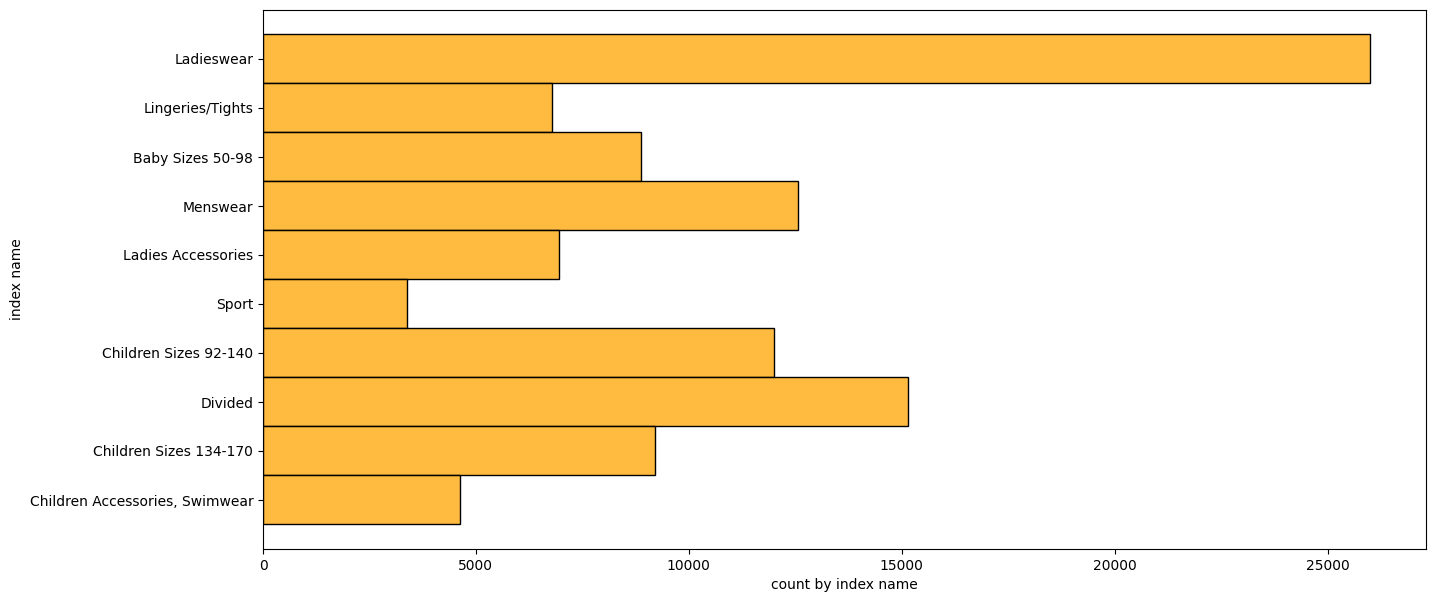

Most Of the Products come under the index name of Ladieswear. Sportswear has the least portion


In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

print("Most Of the Products come under the index name of Ladieswear. Sportswear has the least portion")

# Garments Grouped By Index
Jersey fancy is the most frequent garment, especially for women and children.
Next are the various accessories

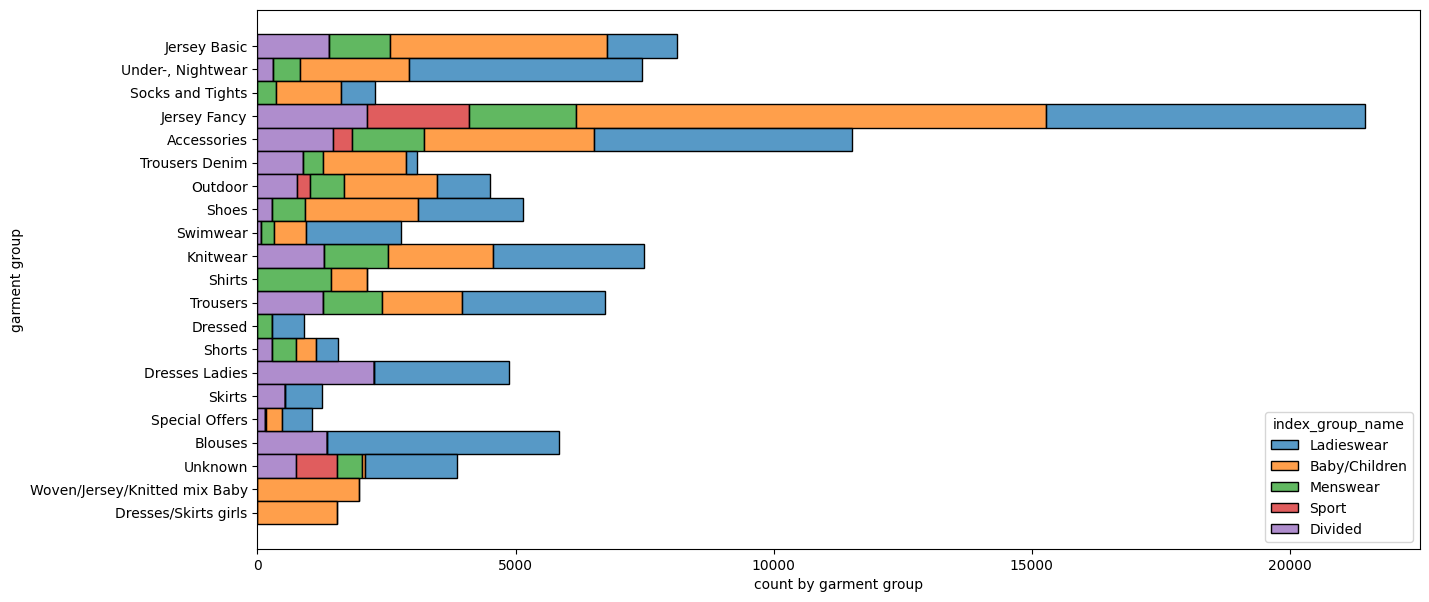

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

## Taking A Look At The Various Index Groups and Subgroups

In [ ]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

## Taking A Look At The Various Product Groups and Subgroups(Product Type)

In [ ]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

## Number Of Unique Values For Each Field

In [ ]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        unq = articles[col].nunique()
        print(f'Number of unique {col}: {unq}')

Number of unique prod_name: 45875
Number of unique product_type_name: 131
Number of unique product_group_name: 19
Number of unique graphical_appearance_name: 30
Number of unique colour_group_name: 50
Number of unique perceived_colour_value_name: 8
Number of unique perceived_colour_master_name: 20
Number of unique department_name: 250
Number of unique index_name: 10
Number of unique index_group_name: 5
Number of unique section_name: 56
Number of unique garment_group_name: 21
Number of unique detail_desc: 43405


In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Total Number Of Unique Product Names:  45875


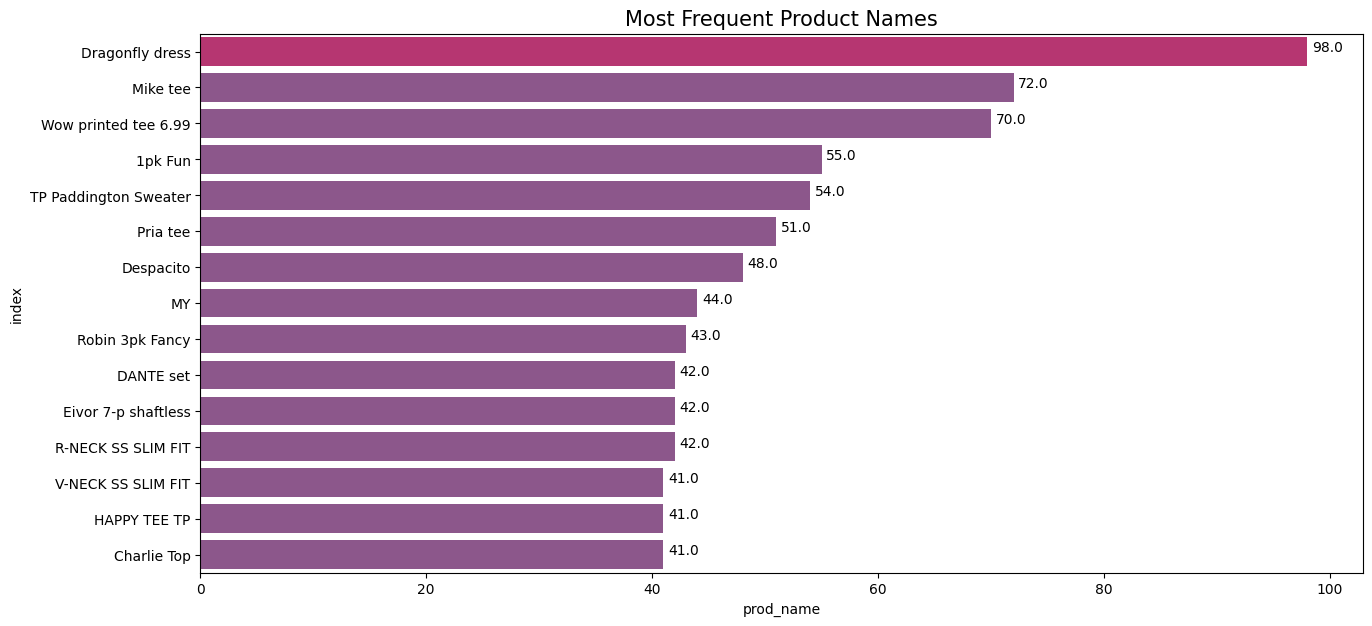

In [ ]:
print("Total Number Of Unique Product Names: ", articles["prod_name"].nunique())

prod_name = articles["prod_name"].value_counts().reset_index().head(15)
clrs = ["#CB2170" if x==max(prod_name["prod_name"]) else '#954E93' for x in prod_name["prod_name"]]

fig, ax = plt.subplots(figsize=(15, 7))
plt.title('Most Frequent Product Names', size=15)
sns.barplot(data=prod_name, x="prod_name", y="index", ax=ax,
            palette=clrs)
show_values(axs=ax, orient="h", space=0.4)

Total Number Of Unique Product Types:  131


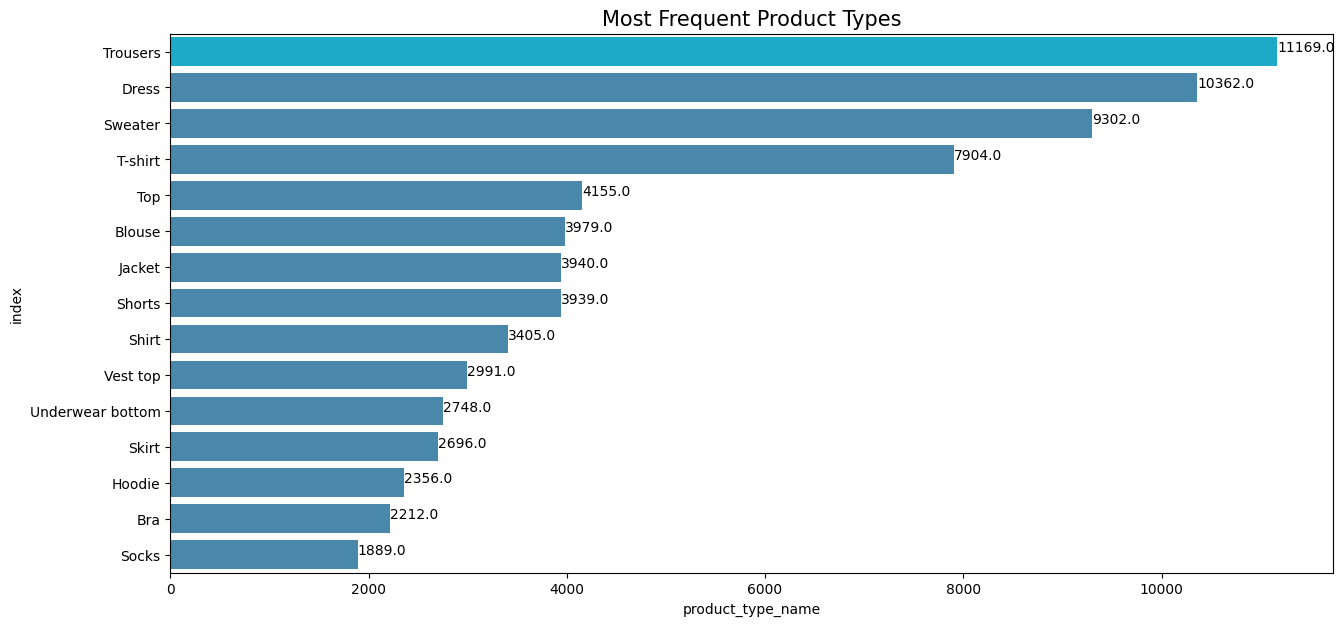

In [ ]:
print("Total Number Of Unique Product Types: ", articles["product_type_name"].nunique())

prod_type = articles["product_type_name"].value_counts().reset_index().head(15)
clrs = ["#00BDE3" if x==max(prod_type["product_type_name"]) else '#398BBB' for x in prod_type["product_type_name"]]

fig, ax = plt.subplots(figsize=(15, 7))
plt.title('Most Frequent Product Types', size=15)

sns.barplot(data=prod_type, x="product_type_name", y="index", ax=ax,
            palette=clrs)
show_values(axs=ax, orient="h", space=0.4)

Total Number Of Unique Product Groups:  19


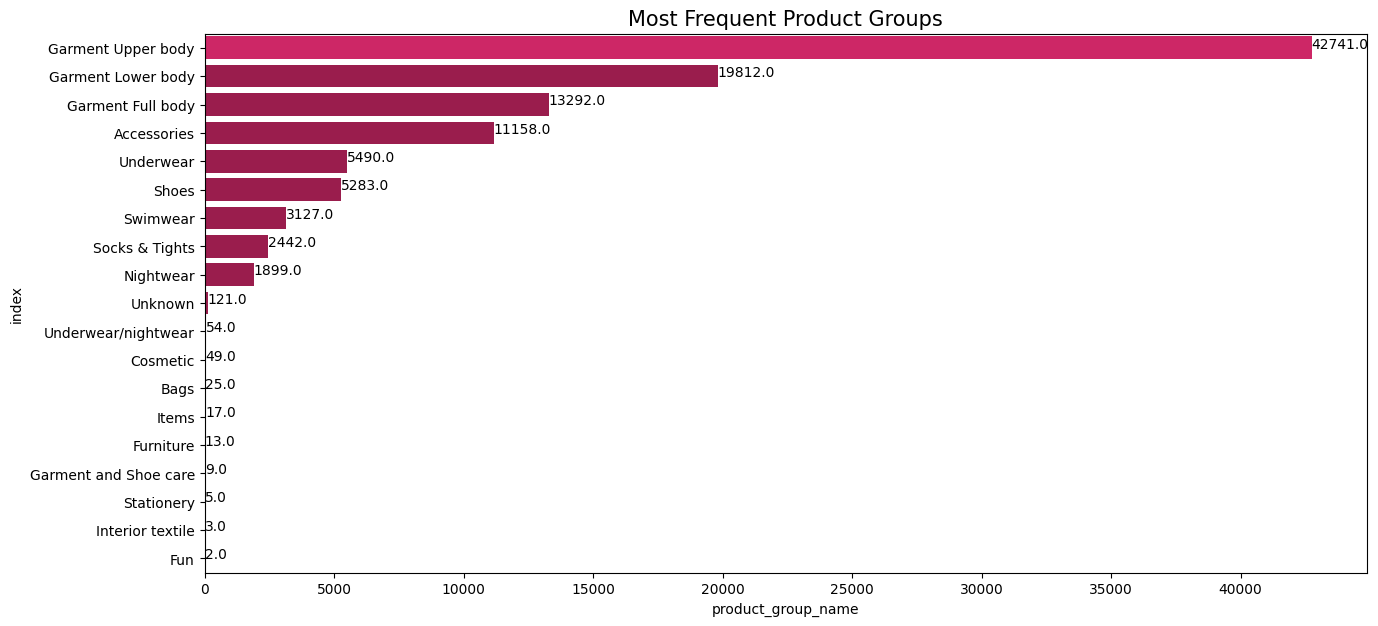

In [ ]:
print("Total Number Of Unique Product Groups: ", articles["product_group_name"].nunique())

prod_group = articles["product_group_name"].value_counts().reset_index()
clrs = ["#E90B60" if x==max(prod_group["product_group_name"]) else '#AF0848' for x in prod_group["product_group_name"]]

fig, ax = plt.subplots(figsize=(15, 7))
plt.title('Most Frequent Product Groups', size=15)

sns.barplot(data=prod_group, x="product_group_name", y="index", ax=ax,
            palette=clrs)
show_values(axs=ax, orient="h", space=0.4)

Total Number Of Unique Product Appearances:  30
Total Number Of Unique Product Colors:  50


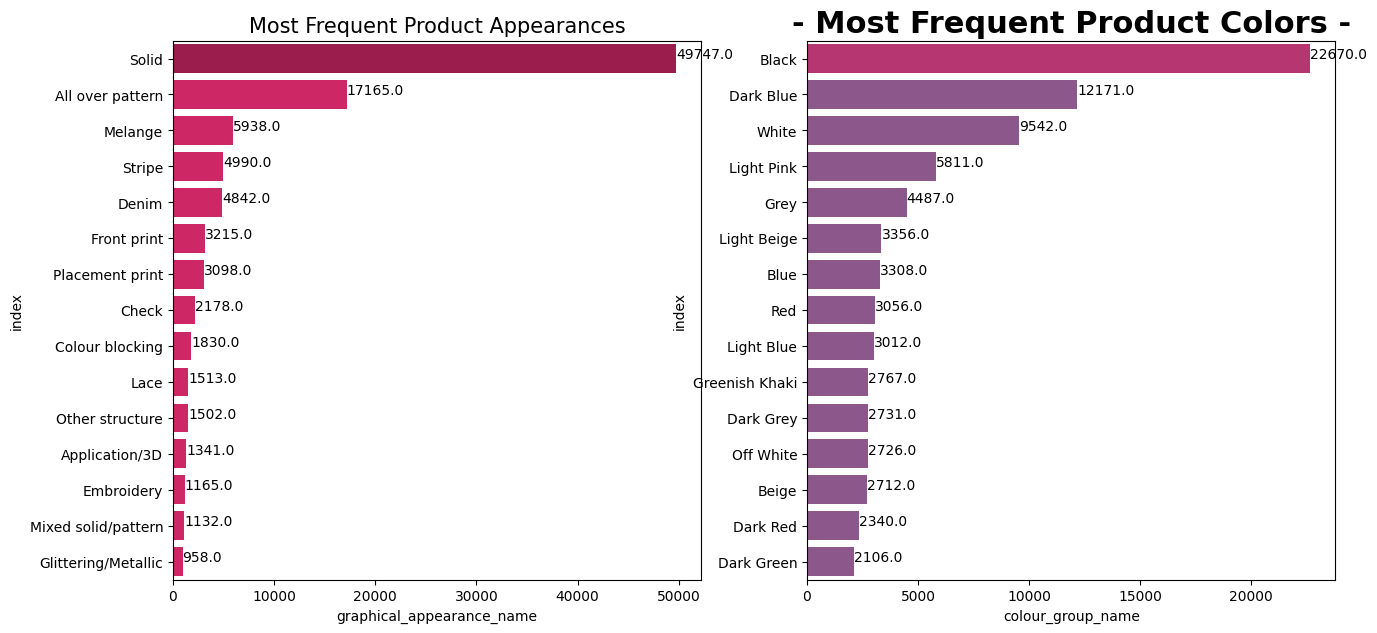

In [ ]:
print("Total Number Of Unique Product Appearances: ", articles["graphical_appearance_name"].nunique())
print("Total Number Of Unique Product Colors: ", articles["colour_group_name"].nunique())


prod_appearance = articles["graphical_appearance_name"].value_counts().reset_index().head(15)
clrs1 = ["#AF0848" if x==max(prod_appearance["graphical_appearance_name"]) else '#E90B60' for x in prod_appearance["graphical_appearance_name"]]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
ax1.set_title('Most Frequent Product Appearances', size=15)
sns.barplot(data=prod_appearance, x="graphical_appearance_name", y="index", ax=ax1,
            palette=clrs1)
show_values(axs=ax1, orient="h", space=0.4)

prod_color = articles["colour_group_name"].value_counts().reset_index().head(15)
clrs2 = ["#CB2170" if x==max(prod_color["colour_group_name"]) else '#954E93' for x in prod_color["colour_group_name"]]

ax2.set_title('- Most Frequent Product Colors -', size=22, weight="bold")
sns.barplot(data=prod_color, x="colour_group_name", y="index", ax=ax2,
            palette=clrs2)
show_values(axs=ax2, orient="h", space=0.4)

# **CUSTOMERS**

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
print(customers.shape)
customers.head()

(1371980, 7)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
print(customers.columns)

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')


# Fields in Customers Dataset

> `customer_id` **<span style="color:#023e8a;">: A unique identifier of every customer</span>**  
> `FN` **<span style="color:#023e8a;">: 1 or missed </span>**  
> `Active` **<span style="color:#023e8a;">: 1 or missed</span>**  
> `club_member_status` **<span style="color:#023e8a;">: Status in club</span>**  
> `fashion_news_frequency` **<span style="color:#023e8a;">: How often H&M may send news to customer</span>**  
> `age` **<span style="color:#023e8a;">: The current age</span>**  
> `postal_code` **<span style="color:#023e8a;">: Postal code of customer</span>**

Checking For Duplicates In The Dataset (No Duplicates Found)

In [ ]:
customers.shape[0] - customers['customer_id'].nunique()

0

In [ ]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

It can be seen that there are quite a few missing values.
So, we will be replacing these missing values:

* for columns FN and Active, replaced all missing values with 0
* for club_member_status and fashion_news_frequency set all missing values with UNKNOWN
* for age imputed all missing values with the median age (which is 32)

Also created an age_interval as well that splits all ages in decades

In [ ]:
def create_age_interval(x):
    if x <= 25:
        return [16, 25]
    elif x <= 35:
        return [26, 35]
    elif x <= 45:
        return [36, 45]
    elif x <= 55:
        return [46, 55]
    elif x <= 65:
        return [56, 65]
    else:
        return [66, 99]

In [ ]:
# Fill FN and Active - the only available value is "1"
customers["FN"].fillna(0, inplace=True)
customers["Active"].fillna(0, inplace=True)

# Set unknown the club member status & news frequency
customers["club_member_status"].fillna("UNKNOWN", inplace=True)

customers["fashion_news_frequency"] = customers["fashion_news_frequency"].replace({"None":"NONE"})
customers["fashion_news_frequency"].fillna("UNKNOWN", inplace=True)

# Set missing values in age with the median
customers["age"].fillna(customers["age"].median(), inplace=True)
customers["age_interval"] = customers["age"].apply(lambda x: create_age_interval(x))

Median Age is:  32.0
The Most Common customers are of age: 20-21


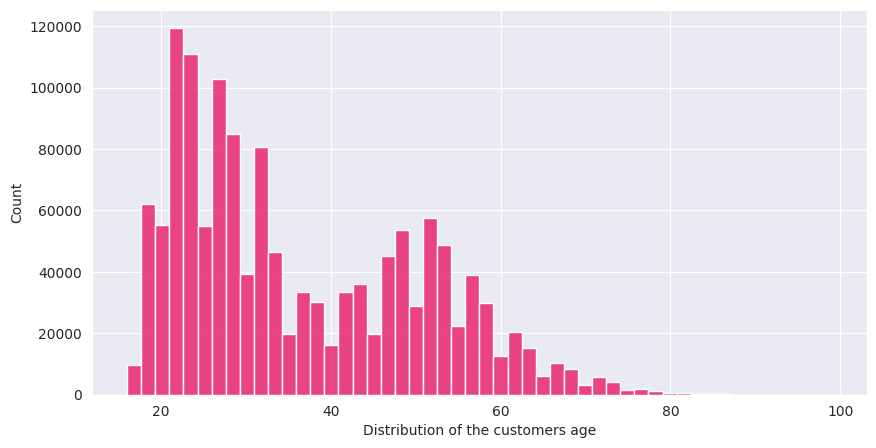

In [ ]:
print('Median Age is: ', customers["age"].median())
print('The Most Common customers are of age: 20-21')

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, color='#E90B60')
ax.set_xlabel('Distribution of the customers age')
plt.show()

H&M Active Membership Club Status

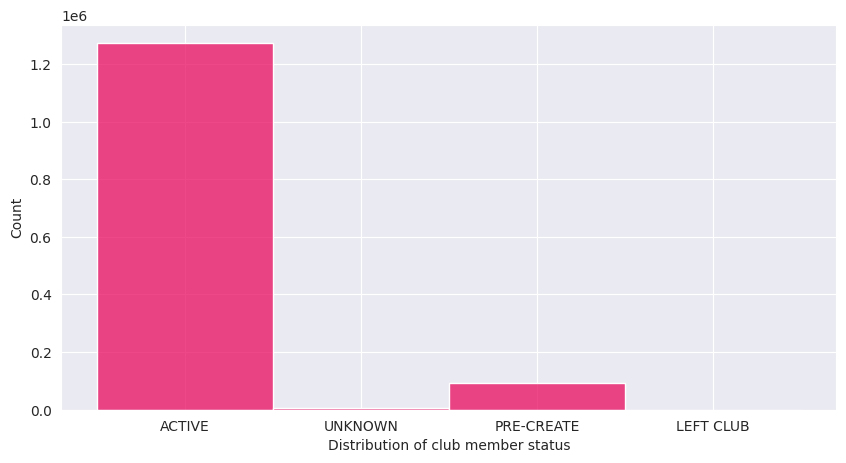

Almost every customer has an active club status, some of them begin to activate it (pre-create). A tiny part of customers abandoned the club.


In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='#E90B60')
ax.set_xlabel('Distribution of club member status')
plt.show()
show_values(axs=ax, orient="v", space=0.4)
print("Almost every customer has an active club status, some of them begin to activate it (pre-create). A tiny part of customers abandoned the club.")

Most Customers Don't Prefer To Get Any Messages About The Current News

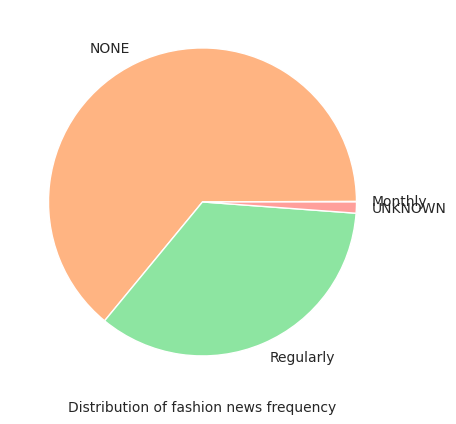

In [ ]:
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

<ipython-input-131-1e679d686f9f>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers["age"], color=my_colors[-3], ax=ax3,


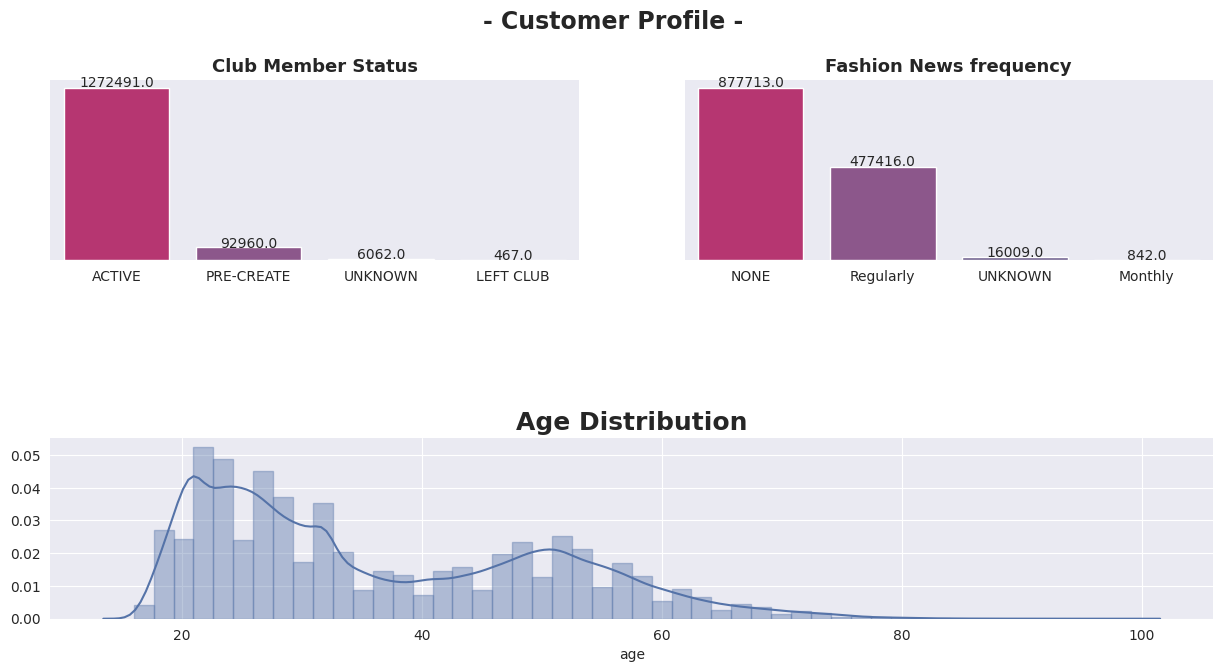

In [ ]:
plt.figure(figsize=(15, 7))
plt.suptitle('- Customer Profile -', size=17, weight="bold")

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)

sns.countplot(data=customers, x="club_member_status", ax=ax1,
              order=customers['club_member_status'].value_counts().index,
              palette=my_colors[2:])
show_values(axs=ax1, orient="v", space=0.4)
ax1.set_title("Club Member Status", size=13, weight="bold")
ax1.set_yticks([])
ax1.set_xlabel("")
ax1.set_ylabel("")

sns.countplot(data=customers, x="fashion_news_frequency", ax=ax2,
              order=customers['fashion_news_frequency'].value_counts().index,
              palette=my_colors[2:])
show_values(axs=ax2, orient="v", space=0.4)
ax2.set_title("Fashion News frequency", size=13, weight="bold")
ax2.set_yticks([])
ax2.set_xlabel("")
ax2.set_ylabel("")

sns.distplot(customers["age"], color=my_colors[-3], ax=ax3,
             hist_kws=dict(edgecolor=my_colors[-3]))
ax3.set_title("Age Distribution", size=18, weight="bold")
ax3.set_ylabel("")

# **TRANSACTIONS**

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [ ]:
print(transactions.shape)
transactions.head()

(31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


# Fields In Transactions Dataset

> `t_dat` **<span style="color:#023e8a;">: A unique identifier of every customer</span>**  
> `customer_id` **<span style="color:#023e8a;">: A unique identifier of every customer </span>**  **<span style="color:#FF0000;">(in </span>** `customers` **<span style="color:#FF0000;"> table)</span>**  
> `article_id` **<span style="color:#023e8a;">: A unique identifier of every article</span>**  **<span style="color:#FF0000;">(in </span>** `articles` **<span style="color:#FF0000;"> table)</span>**  
> `price` **<span style="color:#023e8a;">: Price of purchase</span>**  
> `sales_channel_id` **<span style="color:#023e8a;">: 1 or 2</span>**  

In [ ]:
max_price = transactions['price'].max()
min_price = transactions['price'].min()

print("The prices are altered, with the highest one being {} and the lowest being {}".format(max_price, min_price))

print("Maximum Price is:", transactions["price"].max(), "\n" +
      "Minimum Price is:", transactions["price"].min(), "\n"
      "Average Price is:", transactions["price"].mean())

The prices are altered, with the highest one being 0.5915254237288136 and the lowest being 1.694915254237288e-05
Maximum Price is: 0.5915254237288136 
Minimum Price is: 1.694915254237288e-05 
Average Price is: 0.027829273856993582


In [ ]:
print("Missing values within transactions dataset:")
print(transactions.isna().sum())

Missing values within transactions dataset:
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


It can be seen that the Denims, Trousers and Undergarments are sold the most


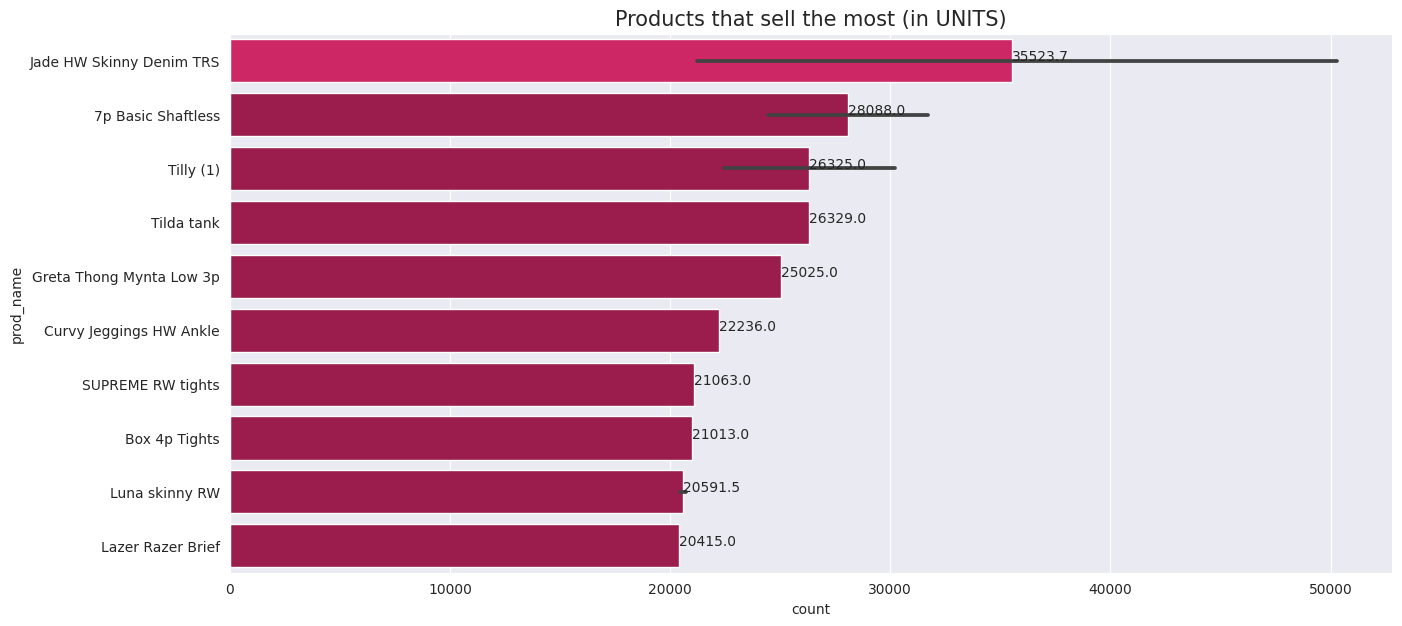

In [ ]:
top_sold_products = transactions["article_id"].value_counts().reset_index().head(15)
top_sold_products.columns = ["article_id", "count"]
top_sold_products = pd.merge(top_sold_products, articles, on="article_id")[["article_id", "count", "prod_name"]]

top_sold_products.head()

clrs = ["#E90B60" if x==max(top_sold_products["count"]) else '#AF0848' for x in top_sold_products["count"]]
fig, ax = plt.subplots(figsize=(15, 7))
plt.title('Products that sell the most (in UNITS)', size=15)

sns.barplot(data=top_sold_products, x="count", y="prod_name", ax=ax,
            palette=clrs)
show_values(axs=ax, orient="h", space=0.4)

print("It can be seen that the Denims, Trousers and Undergarments are sold the most")

=== UNITS/ORDER ===
Maximum Units/Order is: 1895 
Minimum Units/Order is: 1 
Average Units/Order is: 23.334630667241193 

=== SPENDING/ORDER ===
Maximum Spending/Order is: 57.67640677966092 
Minimum Spending/Order is: 0.0007627118644067 
Average Spending/Order is: 0.6493858271904589


<ipython-input-151-b62783d8ac98>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(basket["units"], color=my_colors[-3], ax=ax1,
<ipython-input-151-b62783d8ac98>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(basket["order_price"], color=my_colors[-5], ax=ax2,


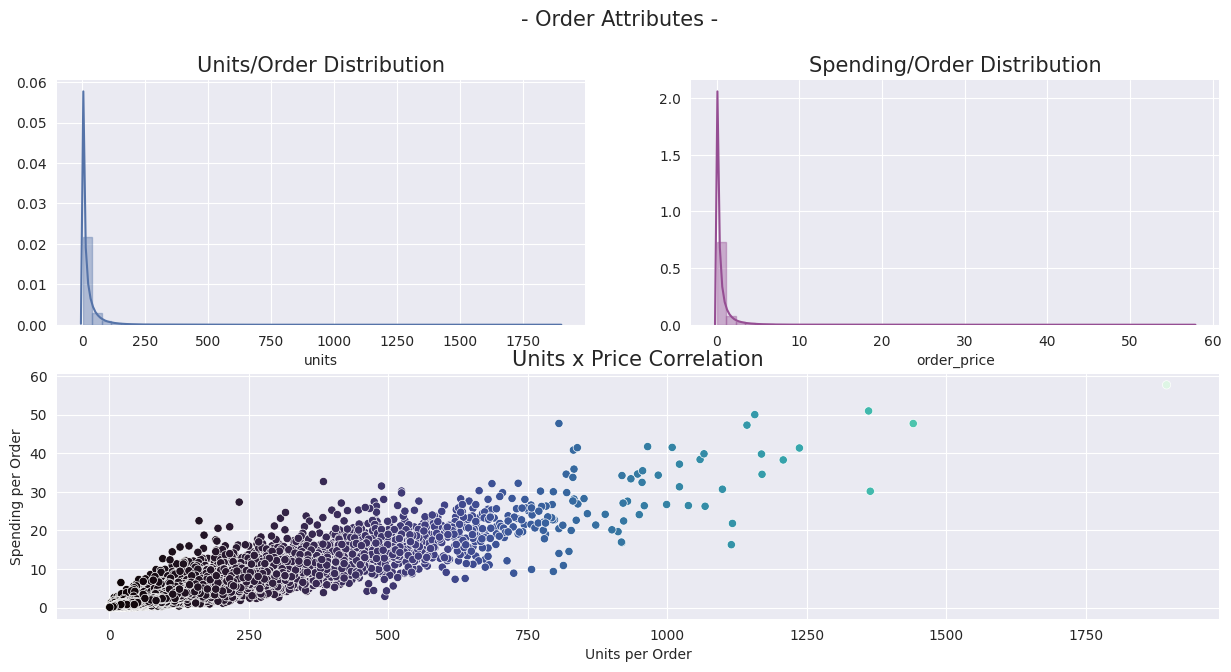

In [ ]:
basket = transactions.groupby("customer_id").agg({'article_id':'count',
                                                  'price': 'sum'}).reset_index()
basket.columns = ["customer_id", "units", "order_price"]

print("=== UNITS/ORDER ===")
print("Maximum Units/Order is:", basket["units"].max(), "\n"
      "Minimum Units/Order is:", basket["units"].min(), "\n"
      "Average Units/Order is:", basket["units"].mean(), "\n")

print("=== SPENDING/ORDER ===")
print("Maximum Spending/Order is:", basket["order_price"].max(), "\n"
      "Minimum Spending/Order is:", basket["order_price"].min(), "\n"
      "Average Spending/Order is:", basket["order_price"].mean())

# Plot
plt.figure(figsize=(15, 7))
plt.suptitle('- Order Attributes -', size=15)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)

sns.distplot(basket["units"], color=my_colors[-3], ax=ax1,
             hist_kws=dict(edgecolor=my_colors[-3]))
ax1.set_title("Units/Order Distribution", size=15)
ax1.set_ylabel("")

sns.distplot(basket["order_price"], color=my_colors[-5], ax=ax2,
             hist_kws=dict(edgecolor=my_colors[-5]))
ax2.set_title("Spending/Order Distribution", size=15)
ax2.set_ylabel("")

sns.scatterplot(data=basket, x="units", y="order_price", hue="units", palette="mako",
                legend=None, ax=ax3)
ax3.set_title("Units x Price Correlation", size=15)
ax3.set_ylabel("Spending per Order")
ax3.set_xlabel("Units per Order")

sns.despine(left=True, bottom=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None);

### Checking For Outliers In The Prices For Different Product Groups

In [ ]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')
articles_for_merge.head()

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,index_name
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2018-09-20,Atlanta Push Body Harlow,Underwear body,Underwear,Lingeries/Tights
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2018-09-20,Rae Push (Melbourne) 2p,Bra,Underwear,Lingeries/Tights
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2018-09-20,Inca Jumper,Sweater,Garment Upper body,Divided
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear


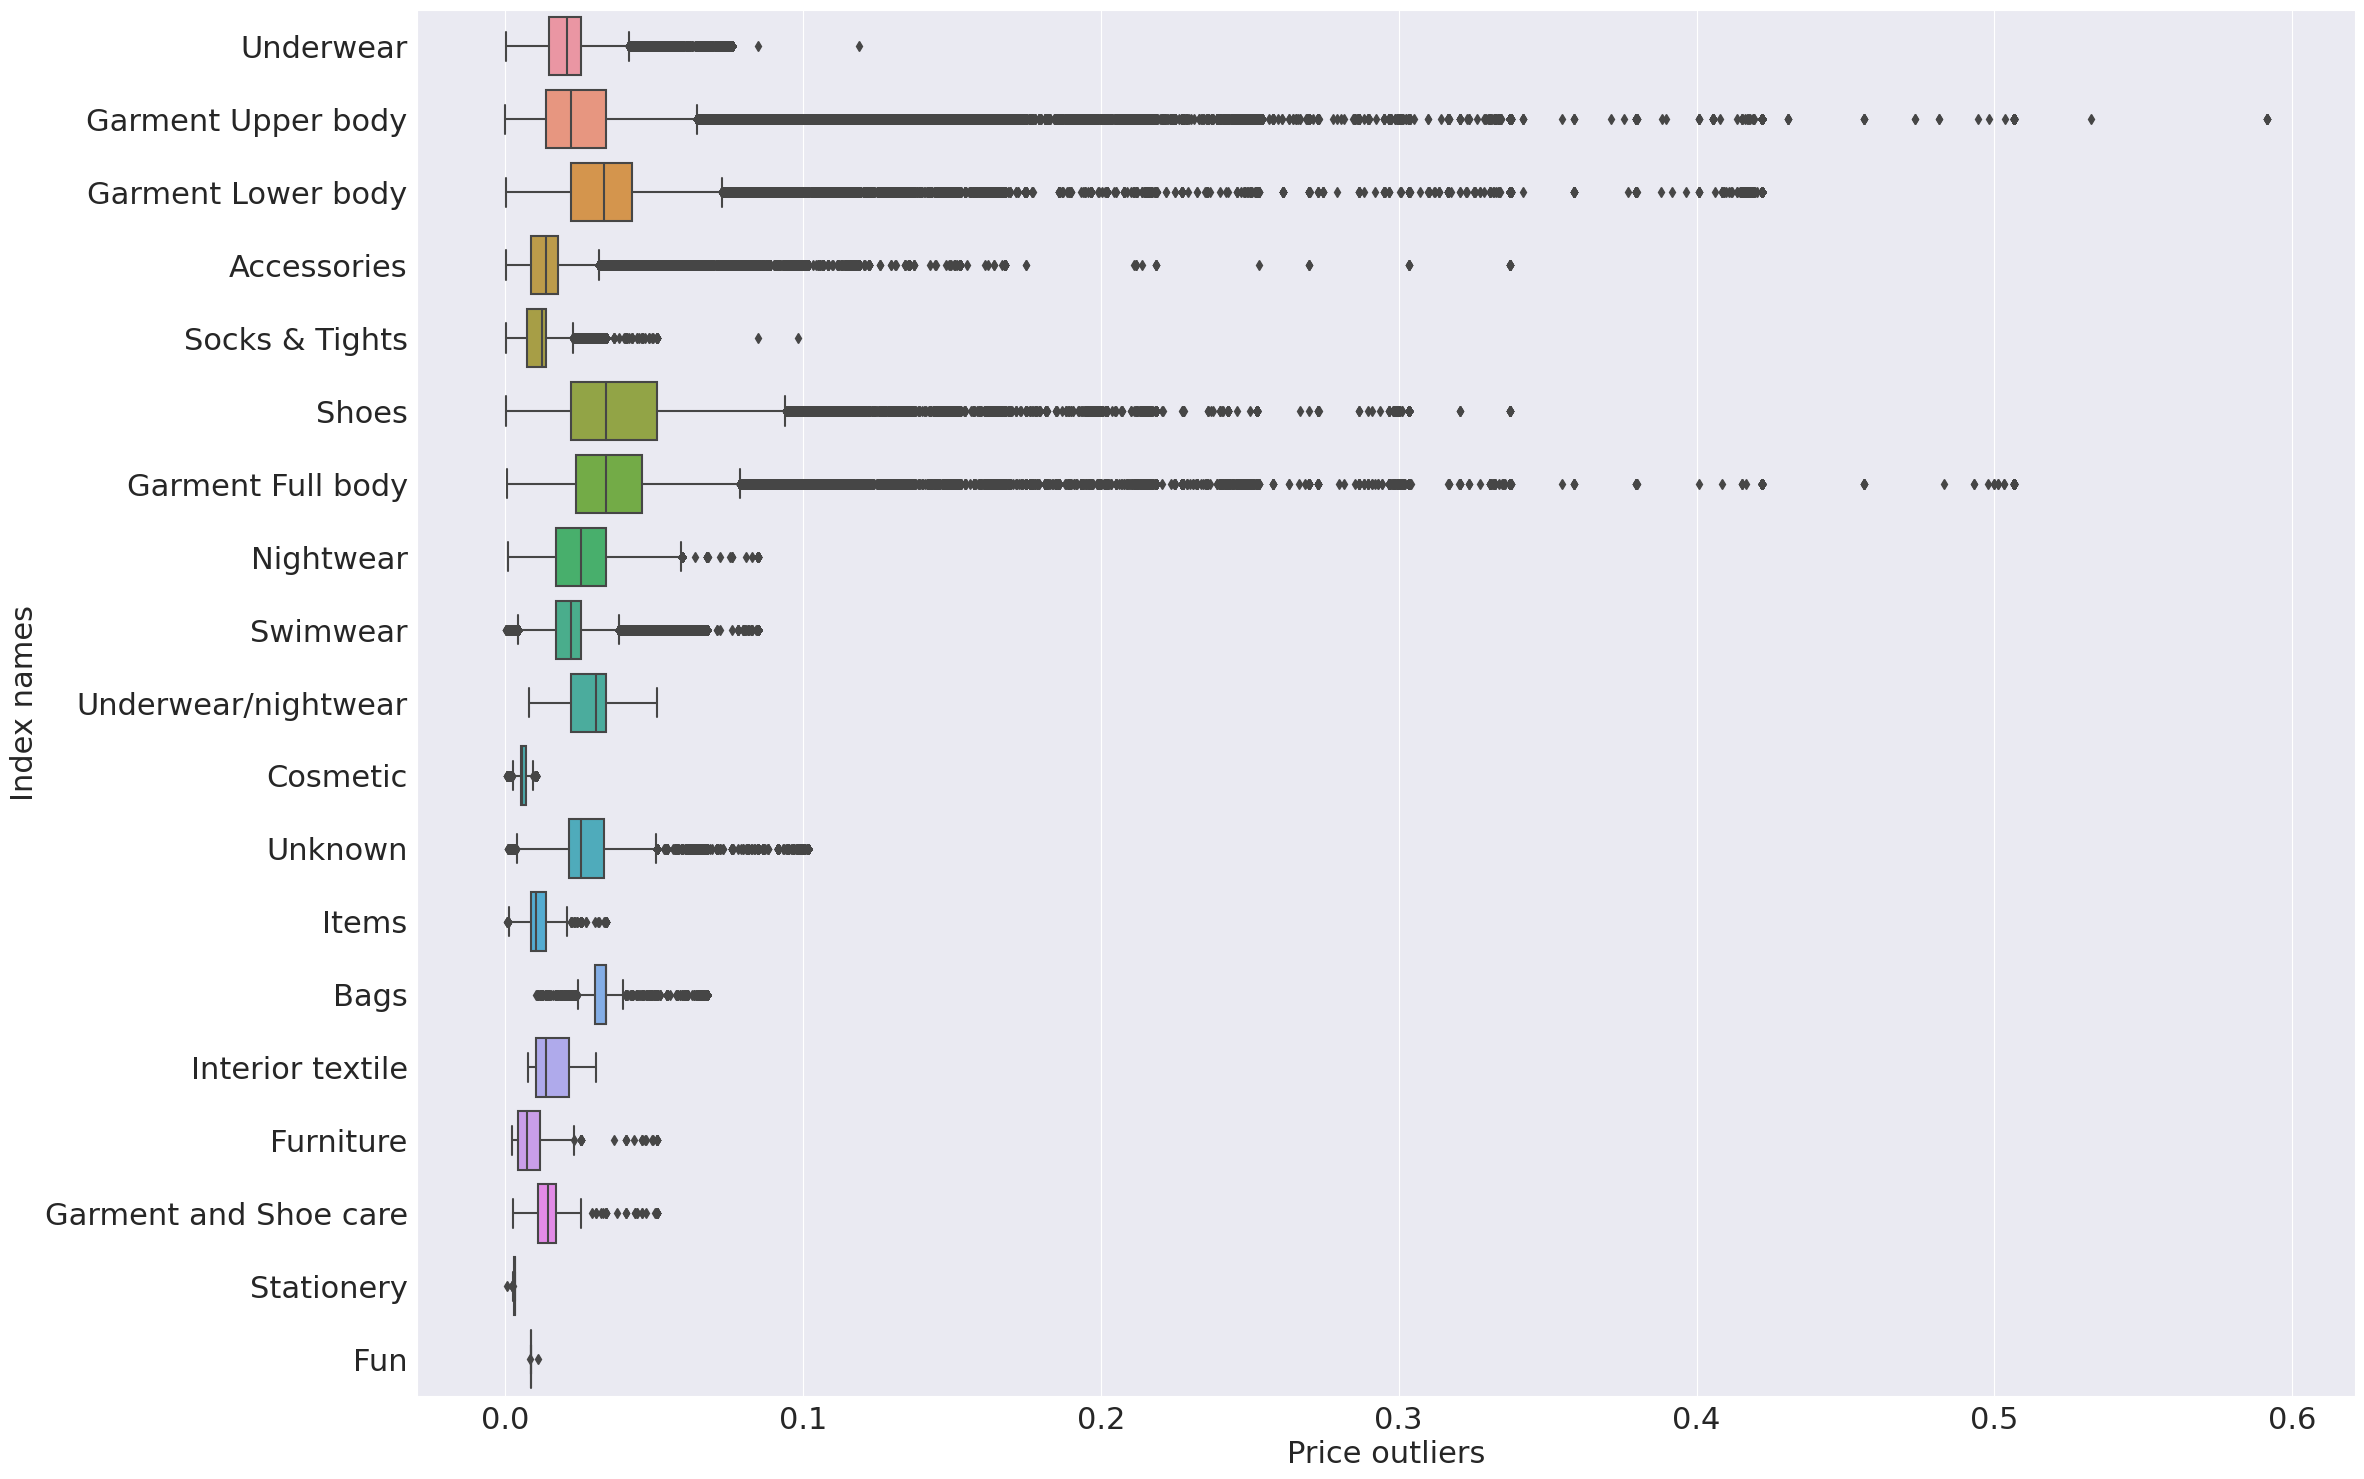

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

We can see that lower/upper/full body have a huge price variance. It could be like some unique collections, relative to casual ones. Some high price articles even belong to accessories group.



Then look at boxplot prices according to accessories product group and find the reasons of high prices inside group.

The largest outliers can be found among bags, which is logical enough. In addition, scarves and other accessories have articles with prices highly contrasting to the rest of garments.

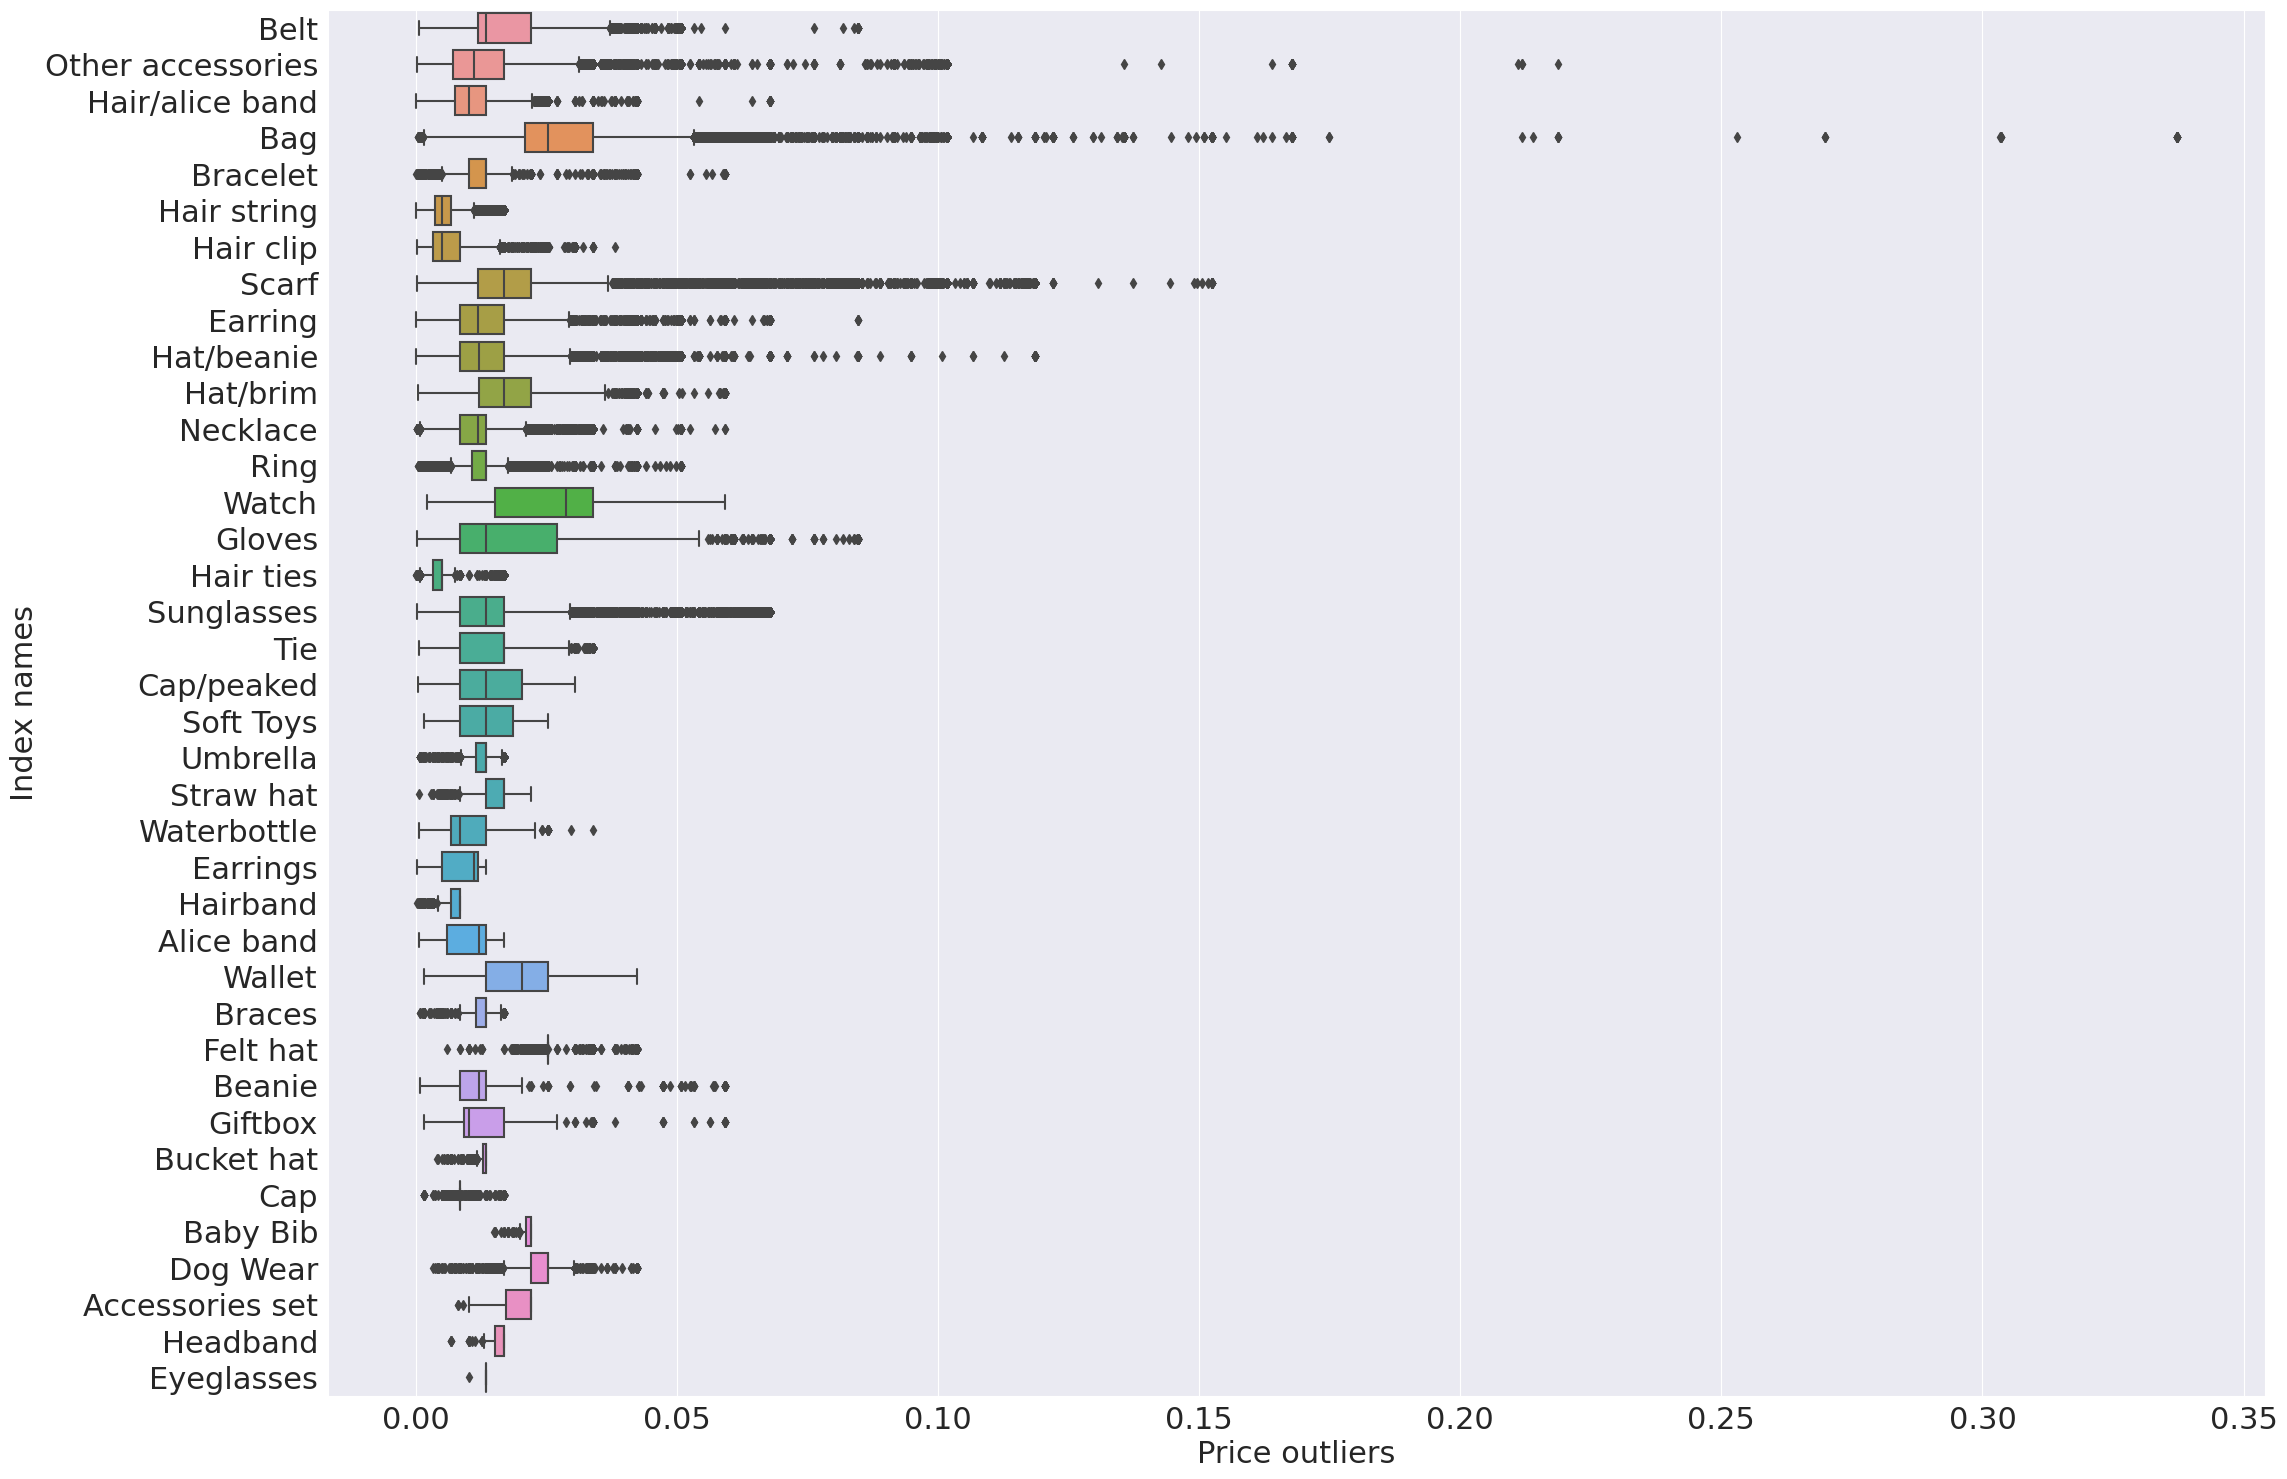

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()

Taking A Look At The Prices By The Product Group

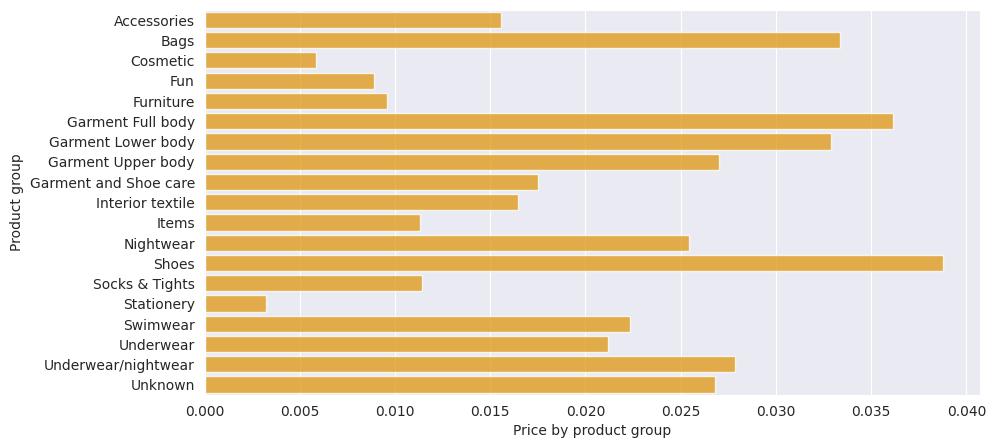

In [ ]:
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

Taking A Look At The Mean Price Change Of The Top 5 Groupts By Price:


* Shoes
* Garment Full body
* Bags
* Garment Lower body
* Underwear/nightwear



In [ ]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

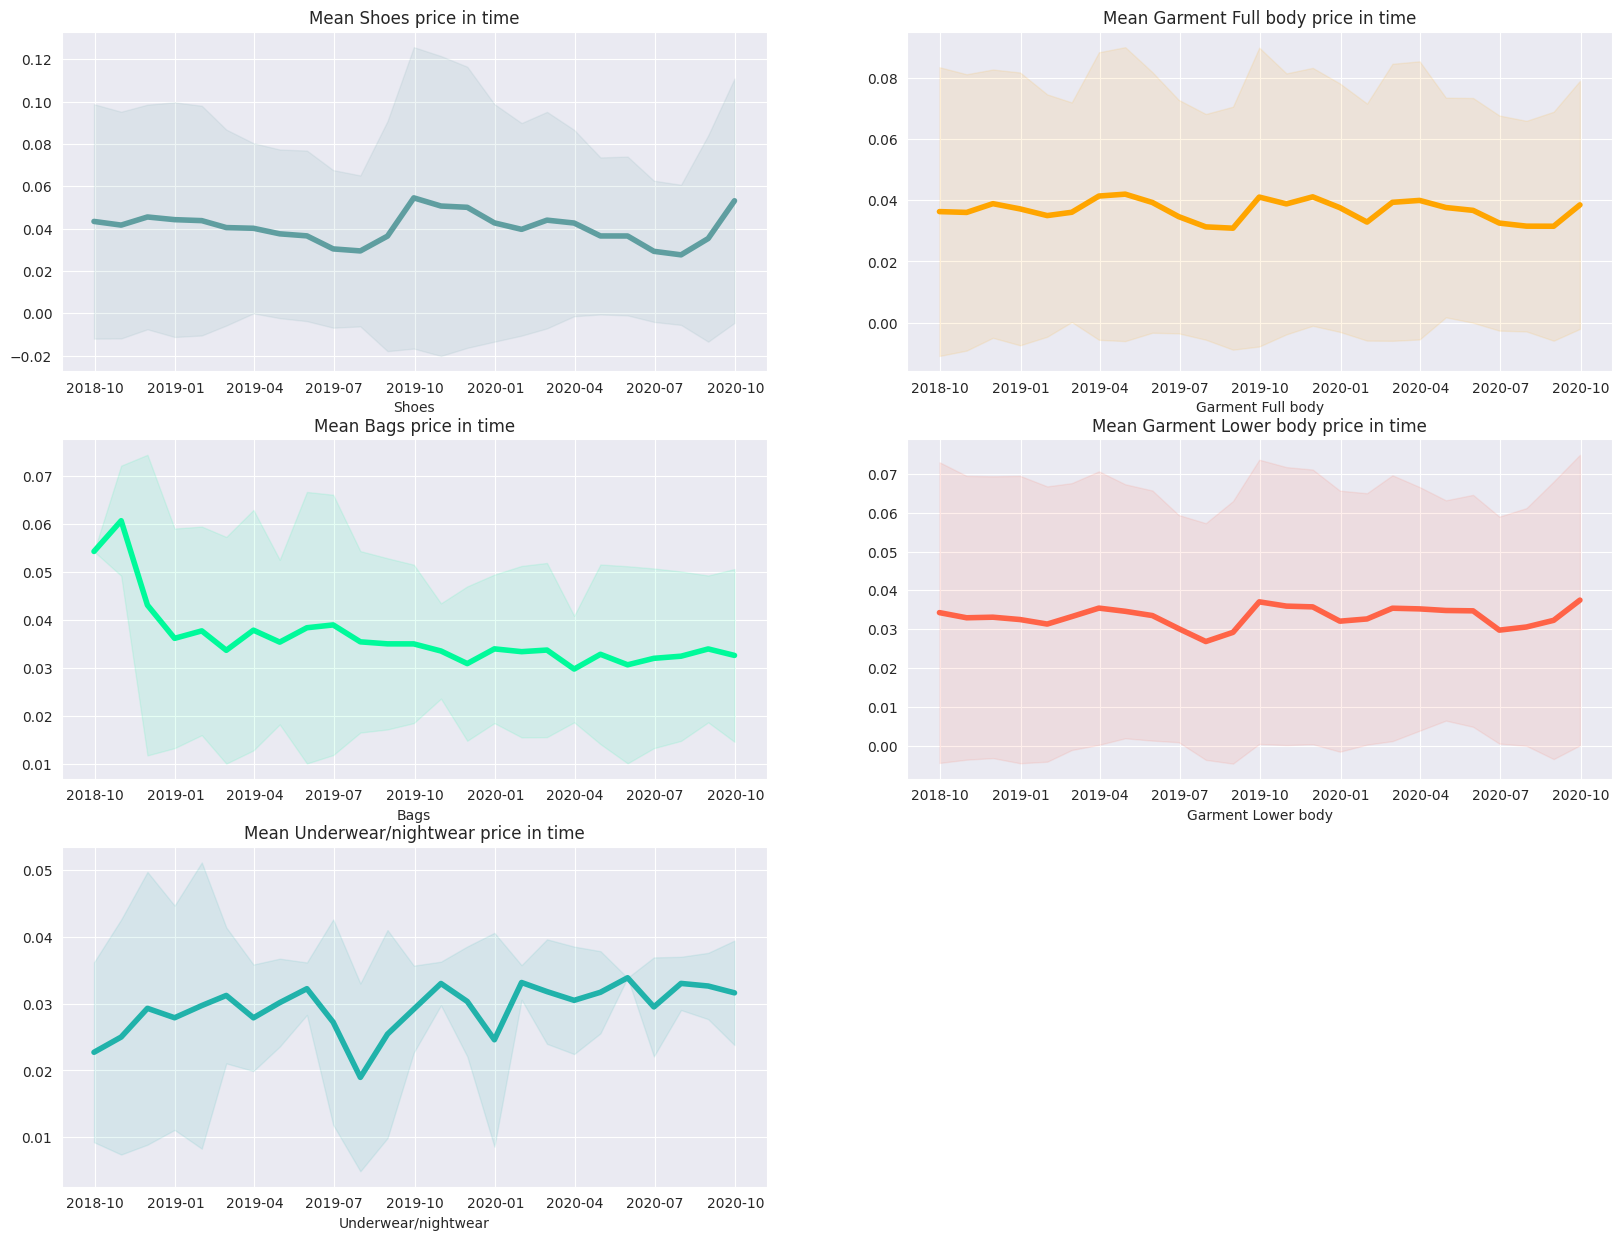

In [ ]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(),
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

# Taking A Look At the Images

Let's check the last purchases by max price and by min price

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
max_price_ids = transactions[transactions.t_dat==transactions.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]
min_price_ids = transactions[transactions.t_dat==transactions.t_dat.min()].sort_values('price', ascending=True).iloc[:5][['article_id', 'price']]

print(max_price_ids.head())
print(min_price_ids.head())

          article_id     price
31761309   916300001  0.506780
31777419   780031004  0.422034
31777418   780031004  0.422034
31777417   780031001  0.422034
31770379   916295002  0.422034
       article_id     price
6401    555294002  0.000847
13885   361531003  0.000847
13884   361531003  0.000847
36629   569094002  0.001424
37158   111586001  0.001475


Images and descriptions of Top 5 images with maximum price

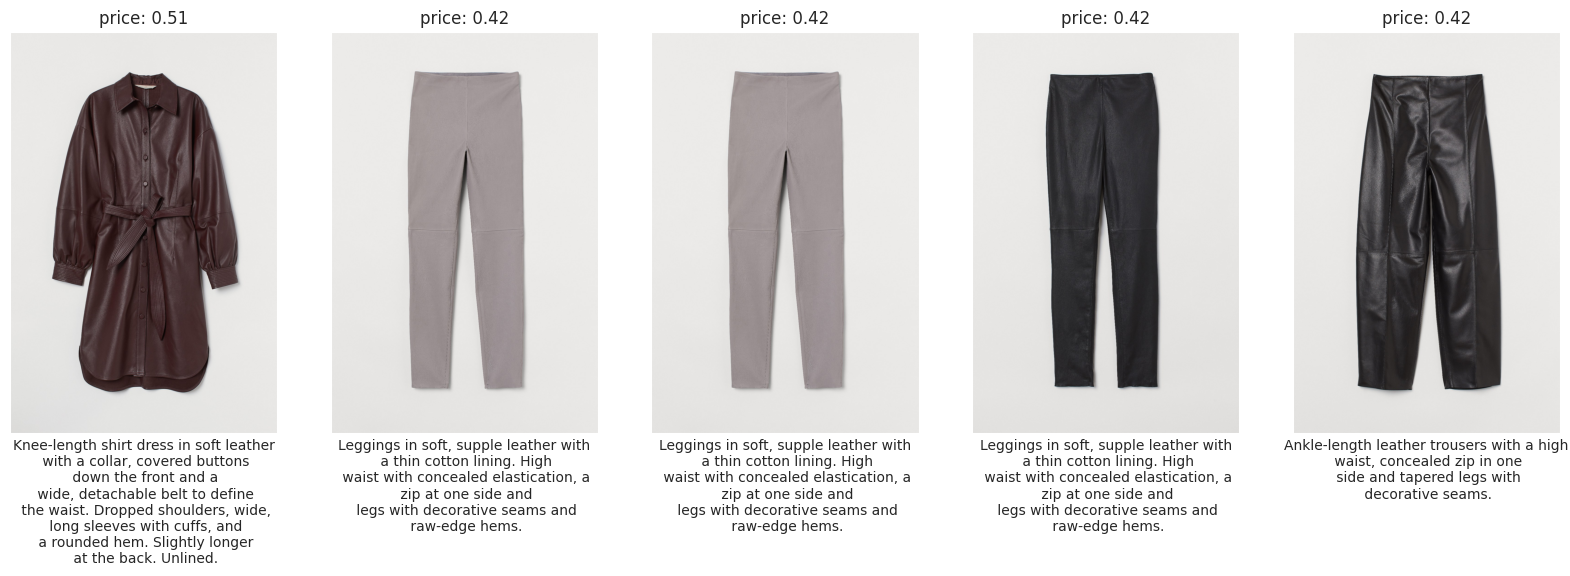

In [ ]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in max_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'data/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.2f}')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=10)
    i += 1
plt.show()

Images and descriptions of Top 5 images with minimum price

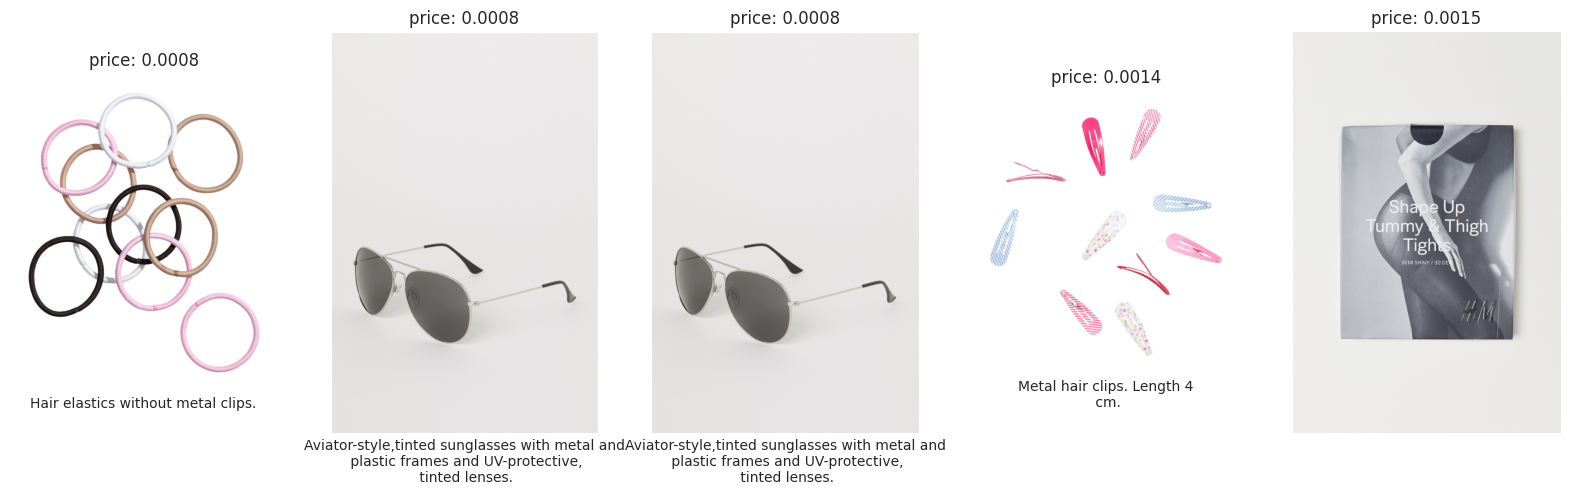

In [ ]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in min_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'data/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()